Import Packages

In [1]:
import json
import requests
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Gathering the data
Specifying the endpoints

In [2]:
endpoint_pagecounts = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

Parameters specification for the pageviews and pagecounts

In [3]:
params_pagecounts_desktop = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2020090100"
                    }
params_pagecounts_mobile = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2020090100"
                    }

params_pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    "end" : "2020090100"
                        }
params_pageviews_mobile_web = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                     "end" : "2020090100"
                        }
params_pageviews_mobile_app = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    "end" : "2020090100"
                        }
headers = {
    'User-Agent': 'https://github.com/ankitapal189',
    'From': 'apal1994@uw.edu'
}

In [4]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

Call the API to get the data

In [5]:
pagecounts_desktop = api_call(endpoint_pagecounts, params_pagecounts_desktop)
pagecounts_mobile = api_call(endpoint_pagecounts, params_pagecounts_mobile)

In [6]:
pageviews_desktop = api_call(endpoint_pageviews, params_pageviews_desktop)
pageviews_mobile_app = api_call(endpoint_pageviews, params_pageviews_mobile_app)
pageviews_mobile_web = api_call(endpoint_pageviews, params_pageviews_mobile_web)

Write the jsons

In [7]:
with open('pagecounts_desktop-site_200712-202008.json', 'w') as outfile:
    json.dump(pagecounts_desktop, outfile)

with open('pagecounts_mobile-site_200712-202008.json', 'w') as outfile:
    json.dump(pagecounts_mobile, outfile)  

with open('pageviews_desktop_200712-202008.json', 'w') as outfile:
    json.dump(pageviews_desktop, outfile) 

with open('pageviews_mobile-web_200712-202008.json', 'w') as outfile:
    json.dump(pageviews_mobile_web, outfile) 
    
with open('pageviews_mobile-app_200712-202008.json', 'w') as outfile:
    json.dump(pageviews_mobile_app, outfile)  


## Step 2: Processing the data
Create dataframes for data analysis from the json

In [8]:
pagecounts_desktop_df = json_normalize(pagecounts_desktop['items'])
pagecounts_mobile_df = json_normalize(pagecounts_mobile['items'])
pageviews_desktop_df = json_normalize(pageviews_desktop['items'])
pageviews_mobile_web_df = json_normalize(pageviews_mobile_web['items'])
pageviews_mobile_app_df = json_normalize(pageviews_mobile_app['items'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


Separate the value of timestamp into four-digit year (YYYY) and two-digit month (MM) and discard values for day and hour (DDHH).

In [9]:
pagecounts_desktop_df['Year']=pagecounts_desktop_df['timestamp'].str.slice(stop=4)
pagecounts_desktop_df['Month']=pagecounts_desktop_df['timestamp'].str.slice(start=4,stop=6)
pagecounts_desktop_df=pagecounts_desktop_df[['Year','Month','count']]

pagecounts_mobile_df['Year']=pagecounts_mobile_df['timestamp'].str.slice(stop=4)
pagecounts_mobile_df['Month']=pagecounts_mobile_df['timestamp'].str.slice(start=4,stop=6)
pagecounts_mobile_df=pagecounts_mobile_df[['Year','Month','count']]

pageviews_mobile_app_df['Year']=pageviews_mobile_app_df['timestamp'].str.slice(stop=4)
pageviews_mobile_app_df['Month']=pageviews_mobile_app_df['timestamp'].str.slice(start=4,stop=6)

pageviews_mobile_web_df['Year']=pageviews_mobile_web_df['timestamp'].str.slice(stop=4)
pageviews_mobile_web_df['Month']=pageviews_mobile_web_df['timestamp'].str.slice(start=4,stop=6)

pageviews_desktop_df['Year']=pageviews_desktop_df['timestamp'].str.slice(stop=4)
pageviews_desktop_df['Month']=pageviews_desktop_df['timestamp'].str.slice(start=4,stop=6)
pageviews_desktop_df=pageviews_desktop_df[['Year','Month','views']]


For data collected from the Pageviews API, combine the monthly values for mobile-app and mobile-web to create a total mobile traffic count for each month.

In [10]:
pageviews_mobile_df=pd.concat([pageviews_mobile_web_df,pageviews_mobile_app_df[['Year','Month','views']]]).groupby(['Year','Month']).sum().reset_index()

Create views and counts dataframe

In [11]:
views_df=pd.merge(pageviews_desktop_df,pageviews_mobile_df,on=['Year','Month'],how='outer',suffixes=('_desktop', '_mobile'))

In [12]:
count_df=pd.merge(pagecounts_desktop_df,pagecounts_mobile_df,on=['Year','Month'],how='outer',suffixes=('_desktop', '_mobile'))

Create the final data frame by joining views and counts

In [13]:
final=pd.merge(views_df,count_df,on=['Year','Month'],how='outer')
final=final.rename(columns={'views_desktop': 'pageview_desktop_views', 'views_mobile': 'pageview_mobile_views','count_desktop':'pagecount_desktop_views','count_mobile':'pagecount_mobile_views'})

Replace NA with 0

In [14]:
final.fillna(0,inplace=True)

Calculate total views and counts

In [15]:
final['pageview_all_views']=final['pageview_desktop_views']+final['pageview_mobile_views']
final['pagecount_all_views']=final['pagecount_desktop_views']+final['pagecount_mobile_views']

Write to csv

In [16]:
final.to_csv('en-wikipedia_traffic_200712-202008.csv',index=False)

## Step 3: Analyze the data
Plot the results

In [17]:
final['date'] = final.apply(lambda r: pd.datetime(int(r['Year']), int(r['Month']), 1), axis=1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


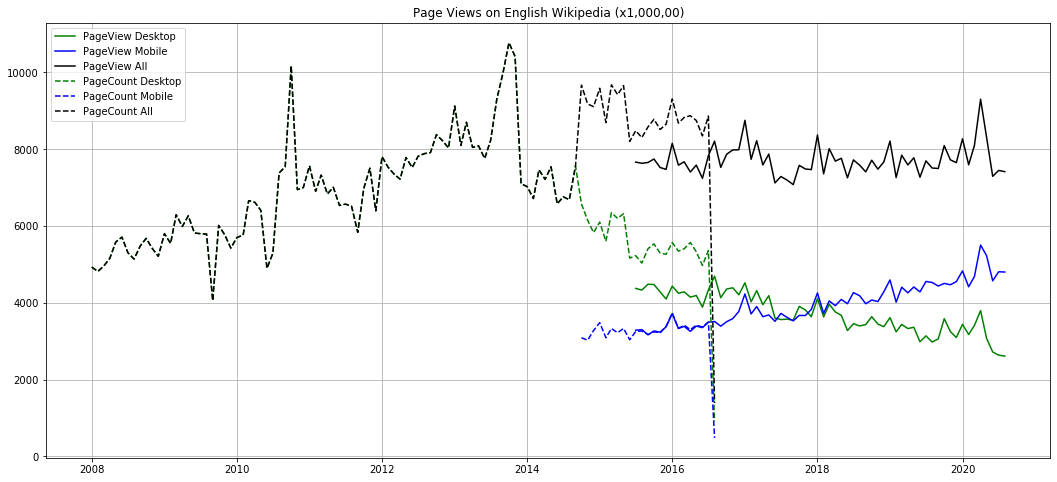

In [18]:
plt.figure(figsize=(18, 8))
final=final.sort_values(by=['date'])

plt.plot(final['date'], final['pageview_desktop_views'].replace(0, np.nan)/1000000,color='g')
plt.plot(final['date'], final['pageview_mobile_views'].replace(0, np.nan)/1000000,color='b')
plt.plot(final['date'], final['pageview_all_views'].replace(0, np.nan)/1000000,color='black')

plt.plot(final['date'], final['pagecount_desktop_views'].replace(0, np.nan)/1000000,color='g',linestyle='--')
plt.plot(final['date'], final['pagecount_mobile_views'].replace(0, np.nan)/1000000,color='b',linestyle='--')
plt.plot(final['date'], final['pagecount_all_views'].replace(0, np.nan)/1000000,color='black',linestyle='--')
plt.legend(["PageView Desktop","PageView Mobile", "PageView All", "PageCount Desktop","PageCount Mobile","PageCount All"])
plt.title("Page Views on English Wikipedia (x1,000,00)")
plt.grid()
plt.savefig("final.png")